In [1]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/diplomski-rad/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Adding utils module.


# Validation dataset

## Load data

In [2]:
X_validate, y_validate = np.load('./dataset-n15-X-validate.npy'), np.load('./dataset-n15-y-validate.npy')

## Helper functions

In [3]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Investigate model 11

In [ ]:
model = load_model('./model-11-repeat.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [362061]


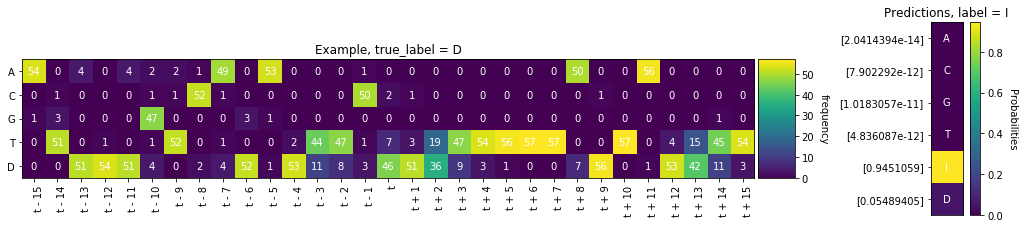

In [35]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [457690]


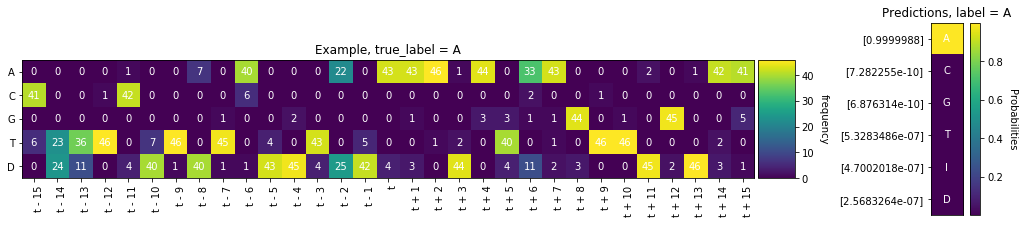

In [12]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 4065
Number of A: 113
Number of C: 141
Number of G: 99
Number of T: 332
Number of I: 2223
Number of D: 1157


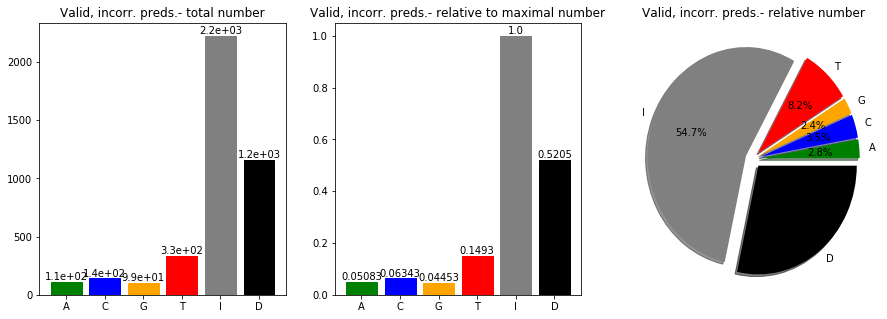

In [13]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 1264223
Number of A: 300911
Number of C: 137946
Number of G: 133296
Number of T: 304625
Number of I: 381534
Number of D: 5911


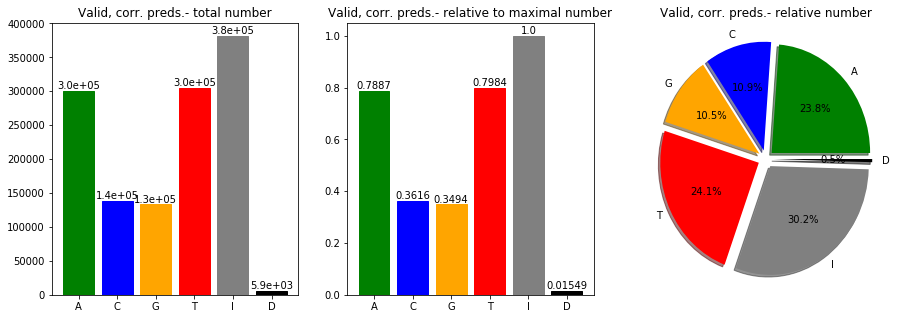

In [14]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')

### Macro measure

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_M:', precision_score(y_validate, predictions, average='macro'))
print('Recall_M:', recall_score(y_validate, predictions, average='macro'))
print('F1_M', f1_score(y_validate, predictions, average='macro'))

Precision_M: 0.9712140711779321
Recall_M: 0.9523663136458486
F1_M 0.9610760839496283


### Micro measure

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_u:', precision_score(y_validate, predictions, average='micro'))
print('Recall_u:', recall_score(y_validate, predictions, average='micro'))
print('F1_u', f1_score(y_validate, predictions, average='micro'))

Precision_u: 0.996794892011909
Recall_u: 0.996794892011909
F1_u 0.996794892011909


### Confusion matrix

Confusion matrix, without normalization
[[300911     18     32     23     33      7]
 [    12 137946      8     32     24     65]
 [    41      4 133296     10     12     32]
 [    70     70     21 304625     79     92]
 [    57     22     23     28 381534   2093]
 [   384     35     72    154    512   5911]]


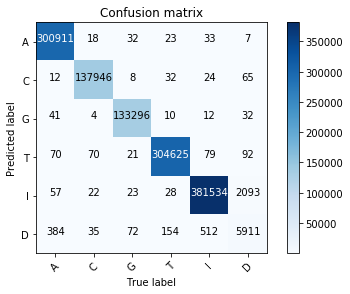

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_validate, axis=1), np.argmax(predictions,axis=1)).T
visualization.plot_confusion_matrix(cm, classes=['A', 'C', 'G', 'T', 'I', 'D'])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, predictions, target_names=['A', 'C', 'G', 'T', 'I', 'D'], digits=5))

             precision    recall  f1-score   support

          A    0.99962   0.99813   0.99888    301475
          C    0.99898   0.99892   0.99895    138095
          G    0.99926   0.99883   0.99904    133452
          T    0.99891   0.99919   0.99905    304872
          I    0.99421   0.99827   0.99624    382194
          D    0.83630   0.72085   0.77430      8200

avg / total    0.99666   0.99679   0.99670   1268288



## Investigate model 11-cw

In [4]:
model = load_model('./model-11-cw.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [875221]


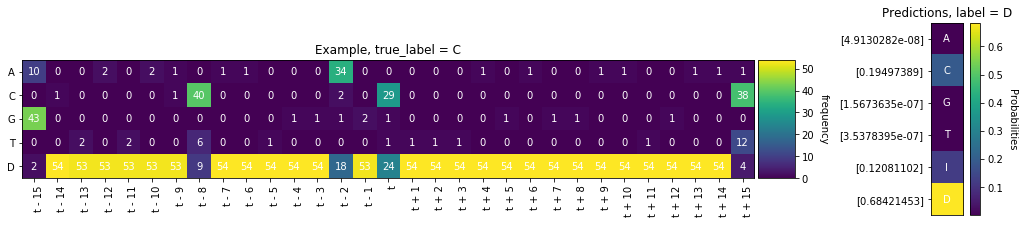

In [5]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [328900]


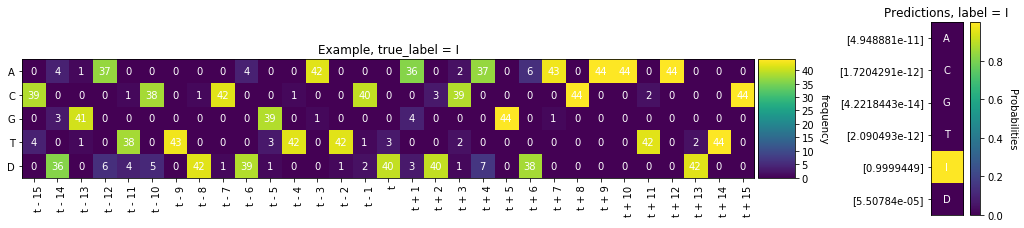

In [6]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 14399
Number of A: 149
Number of C: 65
Number of G: 110
Number of T: 197
Number of I: 156
Number of D: 13722


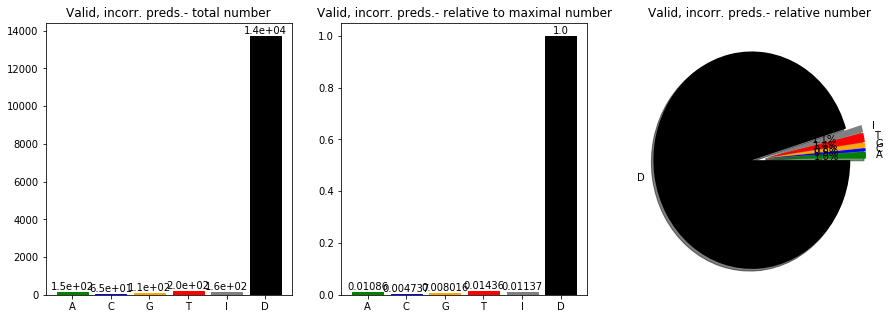

In [7]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 1253889
Number of A: 300698
Number of C: 137538
Number of G: 133215
Number of T: 304132
Number of I: 370257
Number of D: 8049


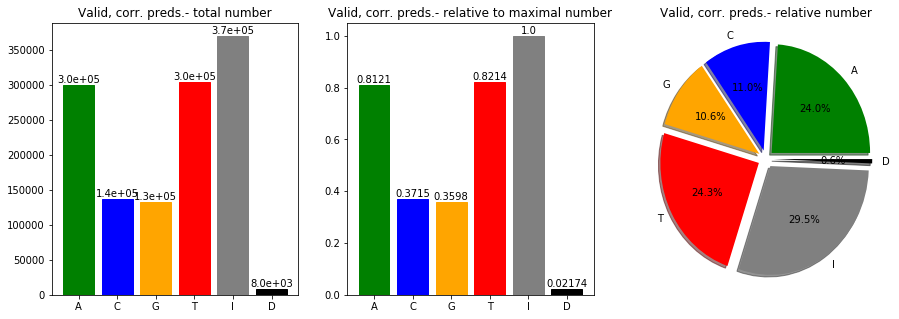

In [8]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')

### Macro measure

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_M:', precision_score(y_validate, predictions, average='macro'))
print('Recall_M:', recall_score(y_validate, predictions, average='macro'))
print('F1_M', f1_score(y_validate, predictions, average='macro'))

Precision_M: 0.8944751385960812
Recall_M: 0.9899230975829695
F1_M 0.919069800102406


### Micro measure

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_u:', precision_score(y_validate, predictions, average='micro'))
print('Recall_u:', recall_score(y_validate, predictions, average='micro'))
print('F1_u', f1_score(y_validate, predictions, average='micro'))

Precision_u: 0.9886469003885553
Recall_u: 0.9886469003885553
F1_u 0.9886469003885553


### Confusion matrix

Confusion matrix, without normalization
[[300698     20     34     47     43      5]
 [     6 137538      4     38     16      1]
 [    56     11 133215     20     18      5]
 [    27     78     16 304132     66     10]
 [    11      6      5      4 370257    130]
 [   677    442    178    631  11794   8049]]


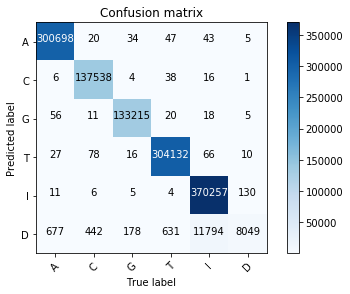

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_validate, axis=1), np.argmax(predictions,axis=1)).T
visualization.plot_confusion_matrix(cm, classes=['A', 'C', 'G', 'T', 'I', 'D'])

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, predictions, target_names=['A', 'C', 'G', 'T', 'I', 'D'], digits=5))

             precision    recall  f1-score   support

          A    0.99950   0.99742   0.99846    301475
          C    0.99953   0.99597   0.99774    138095
          G    0.99917   0.99822   0.99870    133452
          T    0.99935   0.99757   0.99846    304872
          I    0.99958   0.96877   0.98393    382194
          D    0.36971   0.98159   0.53712      8200

avg / total    0.99539   0.98865   0.99105   1268288

